In [1]:
import numpy as np
from sklearn.utils import shuffle
from typing import Callable
import utils

In [9]:
train_data, train_labels = utils.read_train_data()
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)

test_data, test_labels = utils.read_test_data()
test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

In [3]:
class NeuralNetwork:
    learn_rate: float
    correct_in_epoch: int

    # Input / Output
    X: np.array
    Y: np.array

    # Layer functions
    fs: list[Callable[[np.array], np.array]]

    # Weights
    Ws: list[np.array]

    # Biases
    Bs: list[np.array]

    # layers
    As: list[np.array]

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def deriv_sigmoid(self, X):
        return X * (1 - X)

    def softmax(self, X):
        exp = np.exp(X)
        return exp / np.sum(exp)

    def __init__(
            self,
            reshape_input=True,
            learn_rate=0.01,
            neuron_layers=np.array([784, 10, 10]),
    ):
        self.learn_rate = learn_rate
        self.reshape_input = reshape_input
        self.correct_in_epoch = 0
        self.Ws = []
        self.Bs = []

        for i, n in enumerate(neuron_layers[:-1]):
            next_n = neuron_layers[i + 1]
            W = np.random.uniform(-0.5, 0.5, (next_n, n))
            B = np.random.uniform(-0.5, 0.5, (next_n, 1))
            self.Ws.append(W)
            self.Bs.append(B)

        fs = [self.sigmoid] * (len(self.Ws) - 1)
        fs.append(self.softmax)
        self.fs = fs

    def error(self, Y):
        Ao = self.get_output()
        return np.sum(((Ao - Y) ** 2)) / len(Ao)

    def set_io(self, X, Y):
        if self.reshape_input:
            self.X = X.reshape(-1, 1)
            self.Y = Y.reshape(-1, 1)
        else:
            self.X = X
            self.Y = Y

    def is_correct(self):
        self.correct_in_epoch += int(np.argmax(self.Y) == np.argmax(self.get_output()))

    def forward_propagation(self):
        self.As = [self.X]
        for i, (W, B, f) in enumerate(zip(self.Ws, self.Bs, self.fs)):
            A = f(B + np.dot(W, self.As[i]).reshape(-1, 1))
            self.As.append(A)

    def backward_propagation(self):
        m = self.Y.size
        prev_delta = None
        last_index = len(self.Ws) - 1

        for i in range(last_index, -1, -1):
            if i == last_index:
                delta = self.As[i + 1] - self.Y
            else:
                delta = np.dot(self.Ws[i + 1].T, prev_delta) * self.deriv_sigmoid(self.As[i + 1])

            self.Ws[i] += 1 / m * np.dot(delta, self.As[i].T) * -self.learn_rate
            self.Bs[i] += 1 / m * delta * -self.learn_rate

            prev_delta = delta

    def train_iteration(self, X, Y):
        self.set_io(X, Y)
        self.forward_propagation()
        self.backward_propagation()
        self.is_correct()

    def train(self, Xs, Ys, epoch=5):
        print("Start training")
        for i in range(epoch):
            print(f"Epoch {i + 1}")

            for X, Y in zip(Xs, Ys):
                self.train_iteration(X, Y)

            print(f"Correct {self.correct_in_epoch} from {len(Xs)}")
            print(f"Accuracy: {self.correct_in_epoch / len(Xs)}\n")
            self.correct_in_epoch = 0

    def get_output(self):
        return self.As[-1]

    def predict(self, X, Y, argmax=False):
        self.set_io(X, Y)
        self.forward_propagation()
        output = self.get_output()
        if argmax:
            output = output.argmax()
            Y = Y.argmax()
        return output, Y

In [5]:
model = NeuralNetwork(neuron_layers=[
    784,
    300,
    100,
    50,
    20,
    10
])

model.train(train_data, train_labels, epoch=20)

Start training
Epoch 1


C:\Temp\ipykernel_14104\894876104.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


Correct 19918 from 60000
Accuracy 0.3319666666666667

Epoch 2
Correct 39882 from 60000
Accuracy 0.6647

Epoch 3
Correct 48115 from 60000
Accuracy 0.8019166666666667

Epoch 4
Correct 51080 from 60000
Accuracy 0.8513333333333334

Epoch 5
Correct 52382 from 60000
Accuracy 0.8730333333333333

Epoch 6
Correct 53163 from 60000
Accuracy 0.88605

Epoch 7
Correct 53709 from 60000
Accuracy 0.89515

Epoch 8
Correct 54025 from 60000
Accuracy 0.9004166666666666

Epoch 9
Correct 54335 from 60000
Accuracy 0.9055833333333333

Epoch 10
Correct 54570 from 60000
Accuracy 0.9095

Epoch 11
Correct 54838 from 60000
Accuracy 0.9139666666666667

Epoch 12
Correct 54780 from 60000
Accuracy 0.913

Epoch 13
Correct 54989 from 60000
Accuracy 0.9164833333333333

Epoch 14
Correct 55055 from 60000
Accuracy 0.9175833333333333

Epoch 15
Correct 55267 from 60000
Accuracy 0.9211166666666667

Epoch 16
Correct 55290 from 60000
Accuracy 0.9215

Epoch 17
Correct 55484 from 60000
Accuracy 0.9247333333333333

Epoch 18
Correct 

Prediction: 4  |  Label: 4



C:\Temp\ipykernel_14104\894876104.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


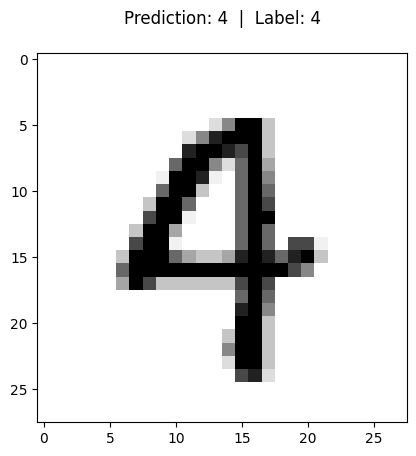

Prediction: 9  |  Label: 9



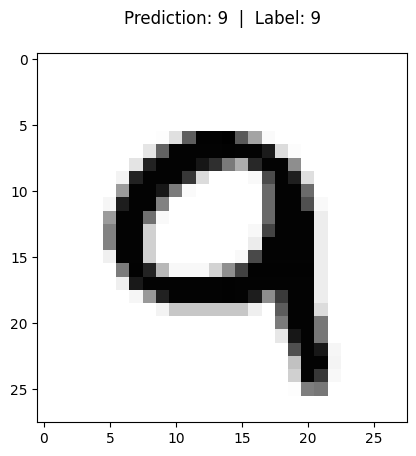

Prediction: 5  |  Label: 5



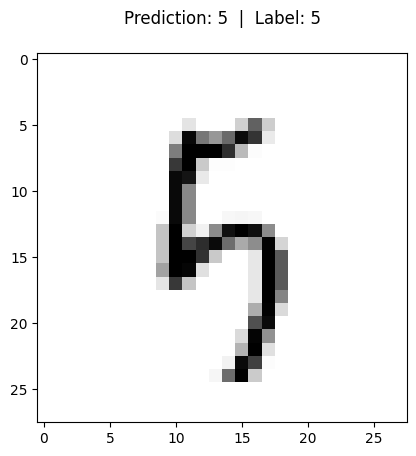

Prediction: 6  |  Label: 6



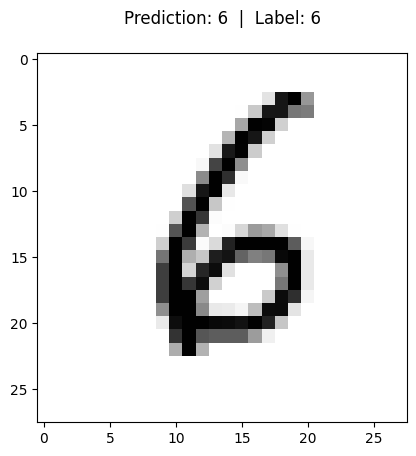

Prediction: 9  |  Label: 9



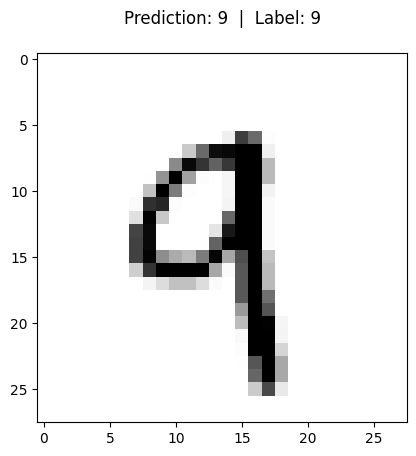

Prediction: 0  |  Label: 0



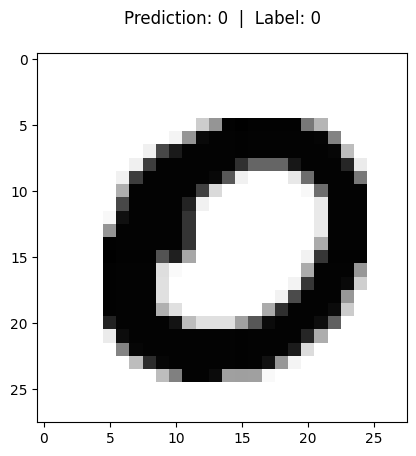

Prediction: 4  |  Label: 9



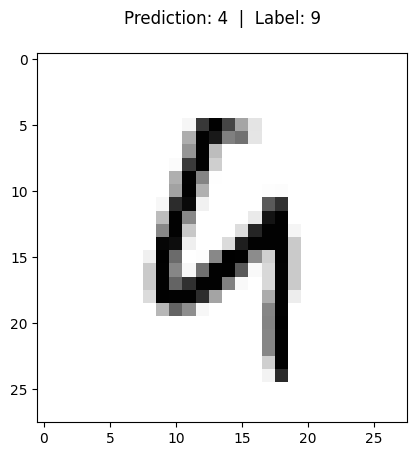

Prediction: 6  |  Label: 6



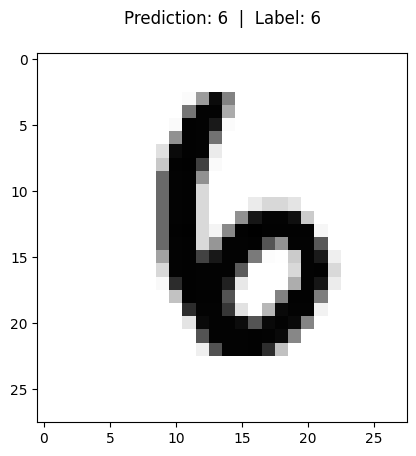

Prediction: 4  |  Label: 4



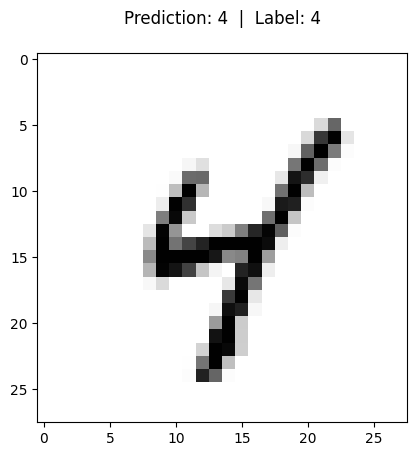

Prediction: 4  |  Label: 4



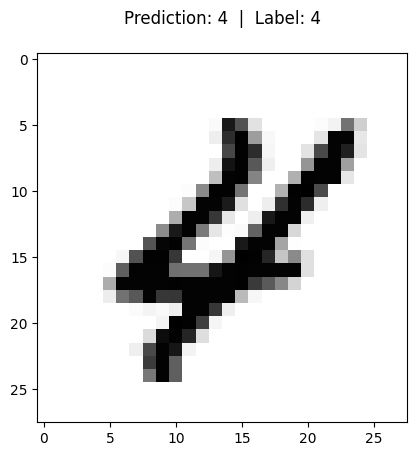

ValueError: invalid literal for int() with base 10: ''

In [11]:
while True:
    index = int(input("Enter a number (0 - 9999): "))
    img, label = test_data[index], test_labels[index]
    prediction, label = model.predict(img, label, argmax=True)

    text = f"Prediction: {prediction}  |  Label: {label}\n"
    print(text)

    utils.draw_image(img, text)